In [190]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# import csv file into dataframe 
book_file = "google_books_1299.csv"
book_df = pd.read_csv(book_file)
book_df

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112,"Medical , Health Care Delivery",9781529018592,English,"Oct 17, 2019"
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368,"Psychology , Cognitive Psychology &amp, Cognition",9780141983776,English,"Sep 28, 2017"
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176,none,9780749460211,English,"Apr 3, 2010"
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168,none,9781302377366,English,"Dec 10, 2014"


In [35]:
# clean up dataframe 

#drop empty lines 
book_df = book_df.dropna(how='any')
# drop duplicates 
new_book_df = book_df.drop_duplicates(subset="title", keep="first")
# rename price to show price in SAR
sar_price_df = new_book_df.rename(columns={"price":"Price (SAR)"})
# reset index 
sar_price_df.reset_index()
sar_price_df

,Unnamed: 0,title,author,rating,voters,Price (SAR),currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,678,One Small Step Can Change Your Life: The Kaize...,Robert Maurer,4.4,186,39.19,SAR,Improve your life fearlessly with this essenti...,Workman Publishing,228,"Self-Help , Personal Growth , Success",9780761181347,English,"Apr 22, 2014"
737,737,Injustice: Gods Among Us Year One - The Comple...,Tom Taylor,4.7,391,98.42,SAR,"Inspired by the video game phenomenon, INJUSTI...",DC,400,none,9781401267452,English,"Mar 8, 2016"
745,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9781418535285,English,"Sep 8, 2002"
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667,"Political Science , Political Ideologies , Gen...",9781627931502,English,"Apr 29, 2013"


In [38]:
# seperate only publisher name and price 
publisher_df = sar_price_df[["publisher","Price (SAR)"]]
# convert to dollar 
dollar = publisher_df["Price (SAR)"] * 0.27 
publisher_df.insert(2, "Price ($)", dollar, True) 
publisher_df.style.format({"Price ($)":"${:,.2f}"})

,publisher,Price (SAR),Price ($)
0,Kodansha Comics,43.280000,$11.69
1,Kensington Publishing Corp.,26.150000,$7.06
2,Dark Horse Comics,133.850000,$36.14
3,Kensington Publishing Corp.,26.150000,$7.06
4,HarperCollins UK,28.540000,$7.71
5,HarperCollins UK,29.290000,$7.91
6,Titan Books,15.820000,$4.27
7,Tor Books,36.790000,$9.93
8,HarperCollins,50.250000,$13.57
9,Pan Macmillan,41.820000,$11.29


In [105]:
# group by publisher 
group_pub_df = publisher_df.groupby(['publisher'])
avg_price = group_pub_df.mean()["Price ($)"]
publish_count = group_pub_df["publisher"].count()
# create a new dataframe 
new_publish_df = pd.DataFrame({"Average Book Price":avg_price,"Number of Books": publish_count})
#format and clean up dataframe 
no_index_df = new_publish_df.reset_index()
no_index_df.style.format({"Average Book Price" : "${:,.2f}"})

,publisher,Average Book Price,Number of Books
0,Abrams,$14.34,1
1,Andrews McMeel Publishing,$8.95,1
2,Archie Comic Publications,$3.18,1
3,Ballantine Books,$8.49,2
4,Bantam,$11.81,3
5,Berrett-Koehler Publishers,$20.15,2
6,Blake Pierce,$4.79,6
7,Bloomsbury Publishing,$18.69,1
8,Bonnier Zaffre Ltd.,$9.95,1
9,BookRix,$0.50,2


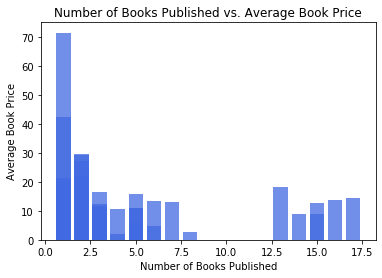

In [212]:
# create variables that can be used to chart 
book_num = no_index_df["Number of Books"]
book_prices = no_index_df["Average Book Price"]
# create chart to represent data 
plt.bar(book_num, book_prices, color="royalblue", alpha=0.75, align="center")
plt.title("Number of Books Published vs. Average Book Price")
plt.xlabel("Number of Books Published")
plt.ylabel("Average Book Price")
# save plot as a png file 
#plt.savefig("./Data_Figures/Number_of_Books_Published_vs_Average_Book_Price.png")
plt.show()

In [154]:
# create a top ten publisher list for book price 
sort_df = no_index_df.sort_values(
    ["Number of Books", "Average Book Price"], ascending=False)
top_pub_df = sort_df.loc[sort_df["Number of Books"] >5, :]
# reset index to number to 10 
top_ten_df = top_pub_df.reset_index()
# remove column named index 
del top_ten_df["index"]
top_ten_df.style.format({"Average Book Price" : "${:,.2f}"})

,publisher,Average Book Price,Number of Books
0,Hachette UK,$14.50,17
1,Marvel Entertainment,$13.68,16
2,Penguin,$12.67,15
3,Simon and Schuster,$8.88,15
4,HarperCollins UK,$8.91,14
5,DC,$18.15,13
6,IDW Publishing,$2.78,8
7,Harper Collins,$13.05,7
8,Del Rey,$13.38,6
9,Blake Pierce,$4.79,6


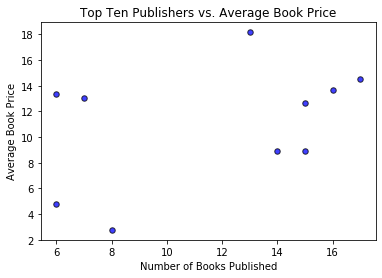

In [207]:
# create variables for chart 
top_num = top_ten_df["Number of Books"]
top_price = top_ten_df["Average Book Price"]
# create chart to represent data 
plt.scatter(top_num, top_price, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Top Ten Publishers vs. Average Book Price")
plt.xlabel("Number of Books Published")
plt.ylabel("Average Book Price")
# save as png file 
plt.savefig("./Data_Figures/Top_Ten_Publishers_vs_Average_Book_Price.png")
plt.show()

In [168]:
pages_df = sar_price_df[["page_count","Price (SAR)"]]
# convert to dollar 
con_dollar = pages_df["Price (SAR)"] * 0.27 
pages_df.insert(2, "Price ($)", con_dollar, True) 
# rename column 
page_count_df= pages_df.rename(columns={"page_count":"Page Count"})
page_count_df.style.format({"Price ($)":"${:,.2f}"})
# sort by page count 
sorted_pages_df= page_count_df.sort_values(
    ["Page Count"], ascending=False)
sorted_pages_df
# remove row with page count error 
no_error_df = sorted_pages_df.drop([288])
# format dollar signs 
no_error_df.style.format({"Price ($)":"${:,.2f}"})


,Page Count,Price (SAR),Price ($)
68,4544,88.060000,$23.78
599,1728,129.510000,$34.97
285,1712,66.120000,$17.85
38,1424,4.170000,$1.13
191,1400,0.000000,$0.00
307,1216,81.870000,$22.10
190,1168,19.650000,$5.31
239,1040,39.340000,$10.62
168,944,55.100000,$14.88
5,864,29.290000,$7.91


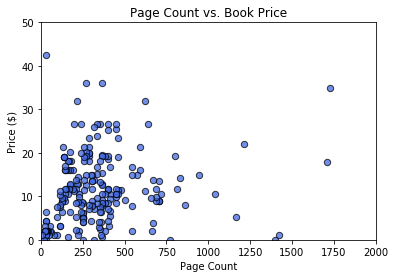

In [209]:
# create x and y axis for plot 
count_pages= no_error_df["Page Count"] 
dollar_price = no_error_df["Price ($)"]

# create a scatter plot to analyze data 
plt.scatter(count_pages, dollar_price, marker="o", facecolors="royalblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlim(0,2000)
plt.ylim(0,50)
plt.xlabel("Page Count")
plt.ylabel("Price ($)")
plt.title("Page Count vs. Book Price")
# save as png file 
plt.savefig("./Data_Figures/Page_Count_vs._Book_Price.png")
# show plot 
plt.show()

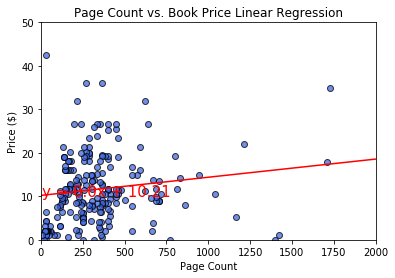

In [210]:
# perform linear regression on scatter plot 
# create linear equation 
(slope, intercept, rvalue, pvalue, stderr) = linregress(count_pages, dollar_price)
regress_values = count_pages * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# create scatter plot 
plt.scatter(count_pages,dollar_price,facecolors="royalblue", edgecolors="black",alpha=0.75)
plt.plot(count_pages,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(0,2000)
plt.ylim(0,50)
plt.xlabel("Page Count")
plt.ylabel("Price ($)")
plt.title("Page Count vs. Book Price Linear Regression")
# save as png file 
plt.savefig("./Data_Figures/Page_Count_vs._Book_Price_Linear_Regression.png")
plt.show()